In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load your CSV file
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df.sample(10)


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
2887,red,5.50,589.0,4.00,0.240200,1.90,8.0,8.506667,9.340000,12.166667,...,1.736667,5.203333,17.816667,5.823333,36.06,0.77,59.11,5.41,77.29,Teff
3117,red,5.40,231.0,2.00,0.140300,0.90,13.0,8.383333,9.543333,13.490000,...,0.413333,4.410000,16.620000,5.430000,0.06,0.70,48.62,6.21,81.38,Teff
811,red,4.70,133.0,3.00,0.170600,2.20,18.0,8.383333,9.543333,13.490000,...,0.413333,4.410000,16.620000,5.430000,0.06,0.70,48.62,6.21,81.38,Dagussa
780,black,5.50,192.0,2.00,0.163700,1.80,11.0,8.343333,9.276667,12.836667,...,0.873333,4.013333,15.060000,4.360000,3.44,0.70,48.62,6.10,79.61,Dagussa
3289,brown,4.90,86.0,2.00,0.222600,1.30,13.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Wheat
3363,dark brown,5.35,575.0,9.76,0.170000,1.75,15.0,9.256667,9.886667,13.570000,...,1.986667,4.086667,11.866667,4.486667,15.62,0.55,4.86,4.86,83.76,Wheat
1105,black,6.30,1134.0,21.00,0.244400,5.50,12.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Maize
429,brown,5.80,628.0,10.00,0.250293,2.40,13.0,8.506667,9.340000,12.166667,...,1.736667,5.203333,17.816667,5.823333,36.06,0.77,59.11,5.41,77.29,Barley
2912,red,5.60,223.0,1.00,0.095000,0.80,8.0,8.506667,9.340000,12.166667,...,1.736667,5.203333,17.816667,5.823333,36.06,0.77,59.11,5.41,77.29,Teff
1006,red,5.70,543.0,4.00,0.217348,4.30,14.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Maize


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Separate features and target
X = df[df.columns[:-1]]  # All columns except 'label'
y = df['label']

# One-hot encode 'Soilcolor'
X = pd.get_dummies(X, columns=['Soilcolor'], drop_first=True)

# Encode target (crop) labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Use scaled features

# Split again using scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Use previously scaled features and encoded labels
knn = KNeighborsClassifier(n_neighbors=17, metric='manhattan')

# Stratified 5-Fold CV preserves class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn, X_scaled, y_encoded, cv=skf, scoring='accuracy')

# Display average accuracy
round(scores.mean() * 100, 2)


np.float64(49.37)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y_encoded)

# Split again on resampled data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_sm, y_train_sm)
y_pred_sm = knn.predict(X_test_sm)

round(accuracy_score(y_test_sm, y_pred_sm) * 100, 2)

79.17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

results = []

# Try odd k values from 1 to 25
for k in range(1, 26, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train_sm, y_train_sm)
    y_pred_sm = knn.predict(X_test_sm)
    acc = round(accuracy_score(y_test_sm, y_pred_sm) * 100, 2)
    results.append((k, acc))

results


[(1, 84.09),
 (3, 79.17),
 (5, 76.32),
 (7, 74.64),
 (9, 73.38),
 (11, 71.53),
 (13, 69.94),
 (15, 68.39),
 (17, 67.59),
 (19, 67.1),
 (21, 66.1),
 (23, 65.01),
 (25, 64.05)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Make predictions
y_pred_rf = rf.predict(X_test_sm)

# Evaluate6
accuracy = accuracy_score(y_test_sm, y_pred_rf)
report = classification_report(y_test_sm, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Random Forest Accuracy: 83.90%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       269
           1       0.77      0.80      0.78       235
           2       0.87      0.98      0.92       224
           3       0.92      0.98      0.95       248
           4       0.76      0.71      0.73       271
           5       0.88      0.95      0.91       271
           6       0.87      0.92      0.89       251
           7       0.91      0.99      0.95       240
           8       0.96      0.98      0.97       242
           9       0.89      0.92      0.90       238
          10       0.65      0.56      0.60       258
          11       0.75      0.61      0.67       277

    accuracy                           0.84      3024
   macro avg       0.84      0.84      0.84      3024
weighted avg       0.83      0.84      0.83      3024



In [ ]:
df.sample(10)

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
3250,black,6.74,258.0,2.00,0.228900,1.70,6.0,8.506667,9.340000,12.166667,...,1.736667,5.203333,17.816667,5.823333,36.06,0.77,59.11,5.41,77.29,Wheat
616,brown,5.67,1112.0,30.00,0.170000,3.40,13.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Bean
3398,red,5.13,526.0,2.39,0.220000,1.79,14.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Wheat
3146,black,6.23,377.0,5.16,0.200000,3.12,12.8,7.730000,9.563333,13.853333,...,0.380000,2.850000,14.686667,3.316667,354.88,0.65,53.49,8.15,82.67,Teff
129,brown,5.70,126.0,6.00,0.313200,2.00,12.0,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.630000,75.69,0.65,0.46,46.10,74.17,Barley
968,brown,5.30,471.0,2.00,0.207025,1.90,23.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Maize
2241,black,7.50,514.0,18.00,0.087400,1.70,11.0,7.933333,8.403333,11.413333,...,1.763333,3.246667,13.013333,3.463333,88.38,0.74,59.11,6.26,76.54,Teff
3165,black,5.40,140.0,16.00,0.125500,2.40,20.0,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Wheat
1974,red,5.31,243.0,4.33,0.087929,0.93,16.7,9.256667,9.886667,13.570000,...,1.986667,4.086667,11.866667,4.486667,15.62,0.55,4.86,4.86,83.76,Teff
3538,red,6.20,613.0,5.00,0.206400,3.10,7.0,9.723333,10.703333,13.773333,...,2.780000,5.403333,19.363333,6.980000,343.44,0.73,59.11,5.19,82.60,Wheat


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")

# Display the first few rows
print(df.head())


         Soilcolor    Ph        K       P     N        Zn       S    QV2M-W  \
0  Yellowish brown  5.81  738.231   5.401  0.23  2.976000  13.816  7.993333   
1  Yellowish brown  5.43  606.382  10.478  0.23  3.077000  16.421  7.993333   
2            brown  5.41  386.580   6.847  0.23  6.611000  16.557  7.993333   
3              red  5.65  207.086   3.418  0.23  0.460181  16.075  7.993333   
4              red  5.27  317.357  39.282  0.23  2.743000  12.558  7.993333   

     QV2M-Sp    QV2M-Su  ...  PRECTOTCORR-W  PRECTOTCORR-Sp  PRECTOTCORR-Su  \
0  10.456667  11.963333  ...       2.073333            5.27       12.303333   
1  10.456667  11.963333  ...       2.073333            5.27       12.303333   
2  10.456667  11.963333  ...       2.073333            5.27       12.303333   
3  10.456667  11.963333  ...       2.073333            5.27       12.303333   
4  10.456667  11.963333  ...       2.073333            5.27       12.303333   

   PRECTOTCORR-Au  WD10M  GWETTOP  CLOUD_AMT  WS2M

In [ ]:
df = pd.get_dummies(df, columns=['Soilcolor'], drop_first=True)

In [ ]:
from sklearn.cluster import KMeans

# Select only soil-related columns for clustering (exclude weather)
soil_features = df[['Ph', 'K', 'P', 'N', 'Zn', 'S']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['SoilProfileCluster'] = kmeans.fit_predict(soil_features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(['label'], axis=1)
y = df['label']

# Encode target labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y_encoded)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n", report)

Random Forest Accuracy: 83.86%
Classification Report:
               precision    recall  f1-score   support

      Barley       0.79      0.71      0.75       269
        Bean       0.77      0.77      0.77       235
     Dagussa       0.87      0.99      0.93       224
      Fallow       0.94      0.99      0.96       248
       Maize       0.75      0.71      0.73       271
  Niger seed       0.89      0.96      0.93       271
         Pea       0.87      0.93      0.90       251
      Potato       0.90      0.97      0.93       240
  Red Pepper       0.96      0.99      0.98       242
     Sorghum       0.88      0.94      0.91       238
        Teff       0.65      0.55      0.60       258
       Wheat       0.73      0.62      0.67       277

    accuracy                           0.84      3024
   macro avg       0.83      0.84      0.84      3024
weighted avg       0.83      0.84      0.83      3024



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")

# Display the first few rows
print(df.head())
df = pd.get_dummies(df, columns=['Soilcolor'], drop_first=True)

         Soilcolor    Ph        K       P     N        Zn       S    QV2M-W  \
0  Yellowish brown  5.81  738.231   5.401  0.23  2.976000  13.816  7.993333   
1  Yellowish brown  5.43  606.382  10.478  0.23  3.077000  16.421  7.993333   
2            brown  5.41  386.580   6.847  0.23  6.611000  16.557  7.993333   
3              red  5.65  207.086   3.418  0.23  0.460181  16.075  7.993333   
4              red  5.27  317.357  39.282  0.23  2.743000  12.558  7.993333   

     QV2M-Sp    QV2M-Su  ...  PRECTOTCORR-W  PRECTOTCORR-Sp  PRECTOTCORR-Su  \
0  10.456667  11.963333  ...       2.073333            5.27       12.303333   
1  10.456667  11.963333  ...       2.073333            5.27       12.303333   
2  10.456667  11.963333  ...       2.073333            5.27       12.303333   
3  10.456667  11.963333  ...       2.073333            5.27       12.303333   
4  10.456667  11.963333  ...       2.073333            5.27       12.303333   

   PRECTOTCORR-Au  WD10M  GWETTOP  CLOUD_AMT  WS2M

In [ ]:
soil_features = df[['Ph', 'K', 'P', 'N', 'Zn', 'S']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
soil_features_scaled = scaler.fit_transform(soil_features)

In [ ]:
from sklearn.metrics import pairwise_distances

# Compute Euclidean distances between each sample
distance_matrix = pairwise_distances(soil_features_scaled, metric='euclidean')

In [ ]:
# Define a reference ideal soil (e.g., loamy profile)
reference_profile = [6.5, 300, 20, 0.2, 2.0, 10.0]  # example values for Ph, K, P, N, Zn, S
reference_scaled = scaler.transform([reference_profile])[0]

# Compute distance to each sample
from numpy.linalg import norm
distances_to_reference = [norm(sample - reference_scaled) for sample in soil_features_scaled]

# Add as a new feature
df['SoilDistanceToLoamy'] = distances_to_reference

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Add this feature to your model training
X = df.drop(['label'], axis=1)
X['SoilDistanceToLoamy'] = distances_to_reference

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = df['label']

# Encode target labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y_encoded)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc * 100:.2f}%")

report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:\n", report)

Random Forest Accuracy: 84.06%
Classification Report:
               precision    recall  f1-score   support

      Barley       0.82      0.71      0.76       269
        Bean       0.76      0.80      0.78       235
     Dagussa       0.87      0.98      0.92       224
      Fallow       0.93      0.99      0.96       248
       Maize       0.75      0.70      0.73       271
  Niger seed       0.88      0.97      0.92       271
         Pea       0.88      0.92      0.90       251
      Potato       0.92      0.98      0.95       240
  Red Pepper       0.96      0.98      0.97       242
     Sorghum       0.87      0.93      0.90       238
        Teff       0.65      0.57      0.61       258
       Wheat       0.76      0.62      0.69       277

    accuracy                           0.84      3024
   macro avg       0.84      0.85      0.84      3024
weighted avg       0.83      0.84      0.84      3024



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 94.91%
Classification Report:
               precision    recall  f1-score   support

      Barley       0.93      0.90      0.91       111
        Bean       0.93      0.91      0.92       123
     Dagussa       0.94      0.98      0.96       232
      Fallow       0.96      1.00      0.98       237
       Maize       0.93      0.84      0.88        85
  Niger seed       0.96      0.95      0.96       212
         Pea       0.91      0.96      0.94       185
      Potato       0.98      1.00      0.99       222
  Red Pepper       0.99      1.00      0.99       267
     Sorghum       0.95      0.92      0.94       204
        Teff       0.91      0.82      0.86        50
       Wheat       0.86      0.76      0.81        75

    accuracy                           0.95      2003
   macro avg       0.94      0.92      0.93      2003
weighted avg       0.95      0.95      0.95      2003



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:08:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated Accuracy: 0.9373
Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


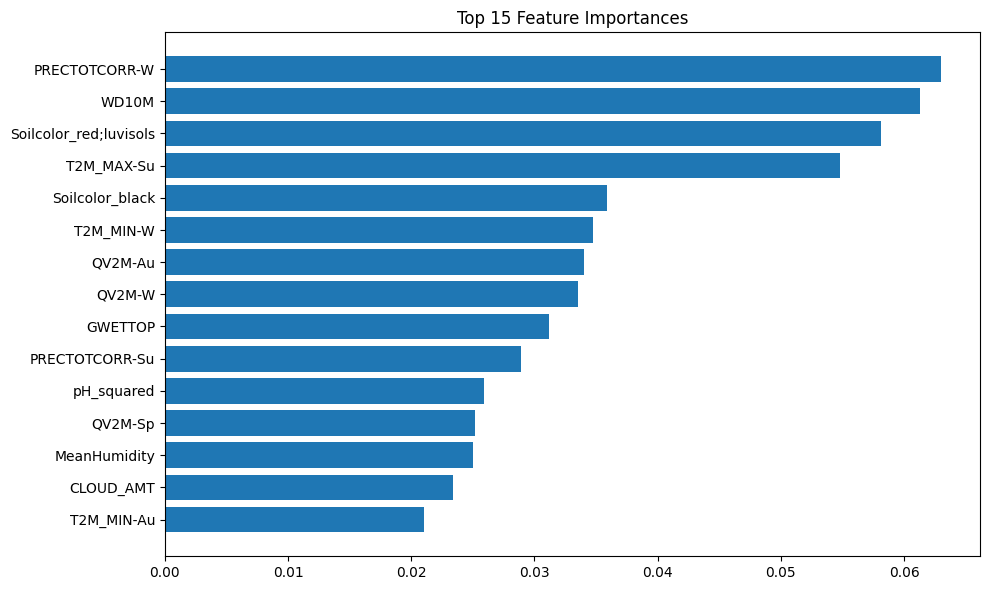

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from numpy.linalg import norm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df = pd.get_dummies(df, columns=['Soilcolor'], drop_first=True)

# --- Feature Engineering ---
soil_features = df[['Ph', 'K', 'P', 'N', 'Zn', 'S']]
scaler = MinMaxScaler()
soil_features_scaled = scaler.fit_transform(soil_features)
reference_profile = [6.5, 300, 20, 0.2, 2.0, 10.0]
reference_scaled = scaler.transform([reference_profile])[0]
df['SoilDistanceToLoamy'] = [norm(sample - reference_scaled) for sample in soil_features_scaled]
df['SoilDistanceBucket'] = pd.qcut(df['SoilDistanceToLoamy'], q=4, labels=False)
df['N_P_ratio'] = df['N'] / (df['P'] + 1e-5)
df['K_P_ratio'] = df['K'] / (df['P'] + 1e-5)
df['pH_squared'] = df['Ph'] ** 2
df['MeanHumidity'] = df[['QV2M-W', 'QV2M-Sp', 'QV2M-Su', 'QV2M-Au']].mean(axis=1)
df['MeanPrecip'] = df[['PRECTOTCORR-W', 'PRECTOTCORR-Sp', 'PRECTOTCORR-Su', 'PRECTOTCORR-Au']].mean(axis=1)

# --- KMeans Clustering on Scaled Soil Features ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
soil_clusters = kmeans.fit_predict(soil_features_scaled)
df['SoilCluster'] = soil_clusters

# --- Encode label and prepare features ---
y = df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = df.drop(['label'], axis=1)

# --- Normalize Features ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- Balance Data ---
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y_encoded)

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# --- Hyperparameter Tuning with XGBoost ---
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

xgb = XGBClassifier(objective='multi:softmax', use_label_encoder=False, eval_metric='mlogloss')
rs = RandomizedSearchCV(xgb, param_grid, cv=3, verbose=1, n_iter=10, scoring='accuracy', n_jobs=-1)
rs.fit(X_train, y_train)

# --- Evaluation ---
best_xgb = rs.best_estimator_
y_pred = best_xgb.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Cross-validated Accuracy: {cross_val_score(best_xgb, X_resampled, y_resampled, cv=5).mean():.4f}")
print("Best Parameters:", rs.best_params_)

# --- Feature Importance Plot ---
importances = best_xgb.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.savefig("feature_importances_with_kmeans.png")
